In [797]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [798]:
file_to_df = pd.read_json("/home/louis/LEON/DATA/Atoms/2024/PINNS2/CNN/experiment_results_single_power.json")
df_to_json = file_to_df.to_json()
json_to_dict = json.loads(df_to_json )

In [799]:
data_type_list = ["Density", "Density,\n Phase", "Density,\n Unwrapped\n Phase", "Phase", "Unwrapped\n Phase", "Density,\n Phase,\n Unwrapped\n Phase"]
models_list = ["v2", "v3", "v4", "v5"]

Model comparison

In [800]:
model_v2_accuracy_n2 = []
model_v2_index_error_n2 = []

model_v2_accuracy_isat = []
model_v2_index_error_isat = []

model_v3_accuracy_n2 = []
model_v3_index_error_n2 = []

model_v3_accuracy_isat = []
model_v3_index_error_isat = []

model_v4_accuracy_n2 = []
model_v4_index_error_n2 = []

model_v4_accuracy_isat = []
model_v4_index_error_isat = []

model_v5_accuracy_n2 = []
model_v5_index_error_n2 = []

model_v5_accuracy_isat = []
model_v5_index_error_isat = []

data_types = ["amp", "amp_pha", "amp_pha_unwrap", "pha", "pha_unwrap", "amp_pha_pha_unwrap"]
model_types = [["model_resnetv2_1powers",model_v2_accuracy_n2,model_v2_index_error_n2,
                model_v2_accuracy_isat,model_v2_index_error_isat],
                ["model_resnetv3_1powers",model_v3_accuracy_n2,model_v3_index_error_n2,
                model_v3_accuracy_isat,model_v3_index_error_isat], 
                ["model_resnetv4_1powers",model_v4_accuracy_n2,model_v4_index_error_n2,
                model_v4_accuracy_isat,model_v4_index_error_isat],
                ["model_resnetv5_1powers",model_v5_accuracy_n2,model_v5_index_error_n2,
                model_v5_accuracy_isat,model_v5_index_error_isat]]

for data_type in data_types:
    for properties in model_types:
        model_type = properties[0]
        model_accuracy_n2 = properties[1]
        model_index_error_n2 = properties[2]

        model_accuracy_isat = properties[3]
        model_index_error_isat = properties[4]

        model_accuracy_n2 += [json_to_dict[data_type][model_type][0]]
        model_index_error_n2 += [json_to_dict[data_type][model_type][1]]

        model_accuracy_isat += [json_to_dict[data_type][model_type][2]]
        model_index_error_isat += [json_to_dict[data_type][model_type][3]]

In [801]:
for index in range(len(model_types)):
    for i in range(1,5):
        model_types[index][i] = np.array(model_types[index][i])

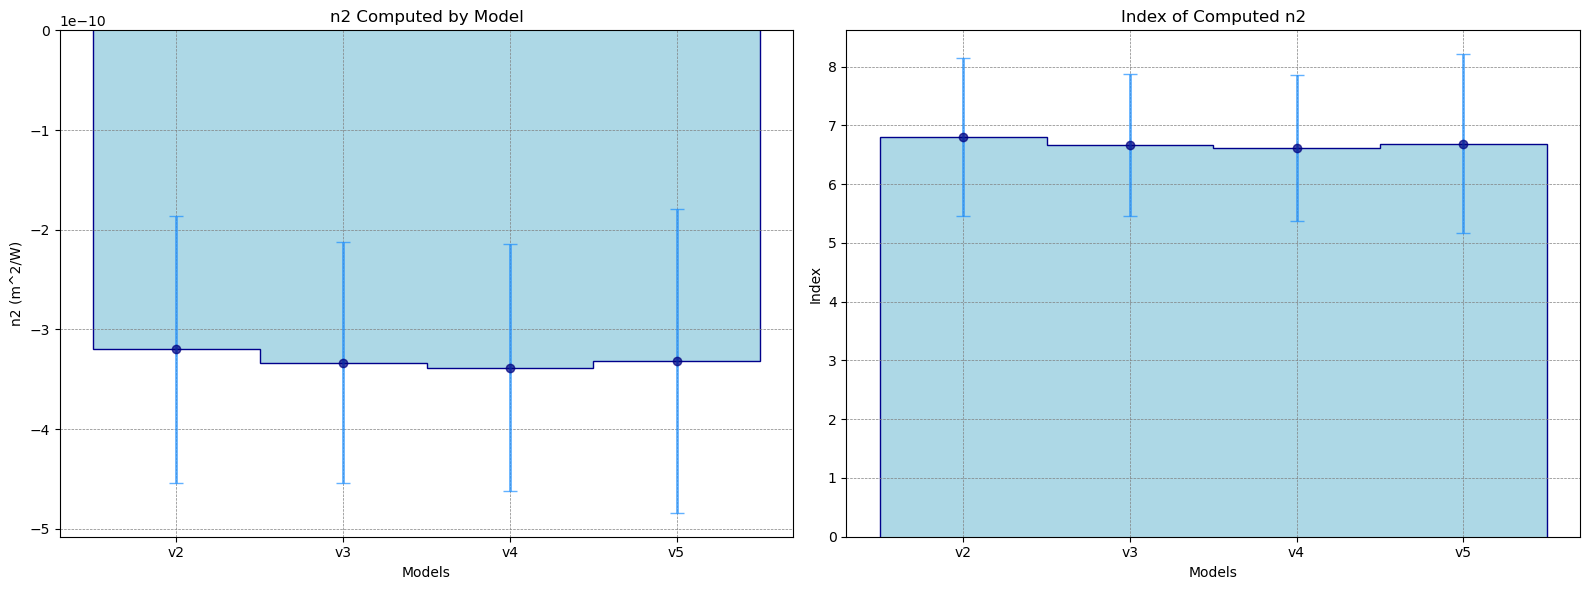

In [802]:
mean_accuracy_n2_models = np.zeros(4)
mean_index_error_n2_models = np.zeros(4)
std_accuracy_n2_models = np.zeros(4)
std_index_error_n2_models = np.zeros(4)


for index in range(len(model_types)):
    mean_accuracy_n2_models[index] = np.mean(model_types[index][1])
    mean_index_error_n2_models[index] = np.mean(model_types[index][2])
    std_accuracy_n2_models[index] = np.std(model_types[index][1])#/np.sqrt(len(model_types[index][1]))
    std_index_error_n2_models[index] = np.std(model_types[index][2])#/np.sqrt(len(model_types[index][2]))

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_n2_models, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_n2_models, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_n2_models, yerr=std_accuracy_n2_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title("n2 Computed by Model")
ax[0].set_ylabel('n2 (m^2/W)')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_n2_models, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_n2_models, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_n2_models, yerr=std_index_error_n2_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title("Index of Computed n2")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

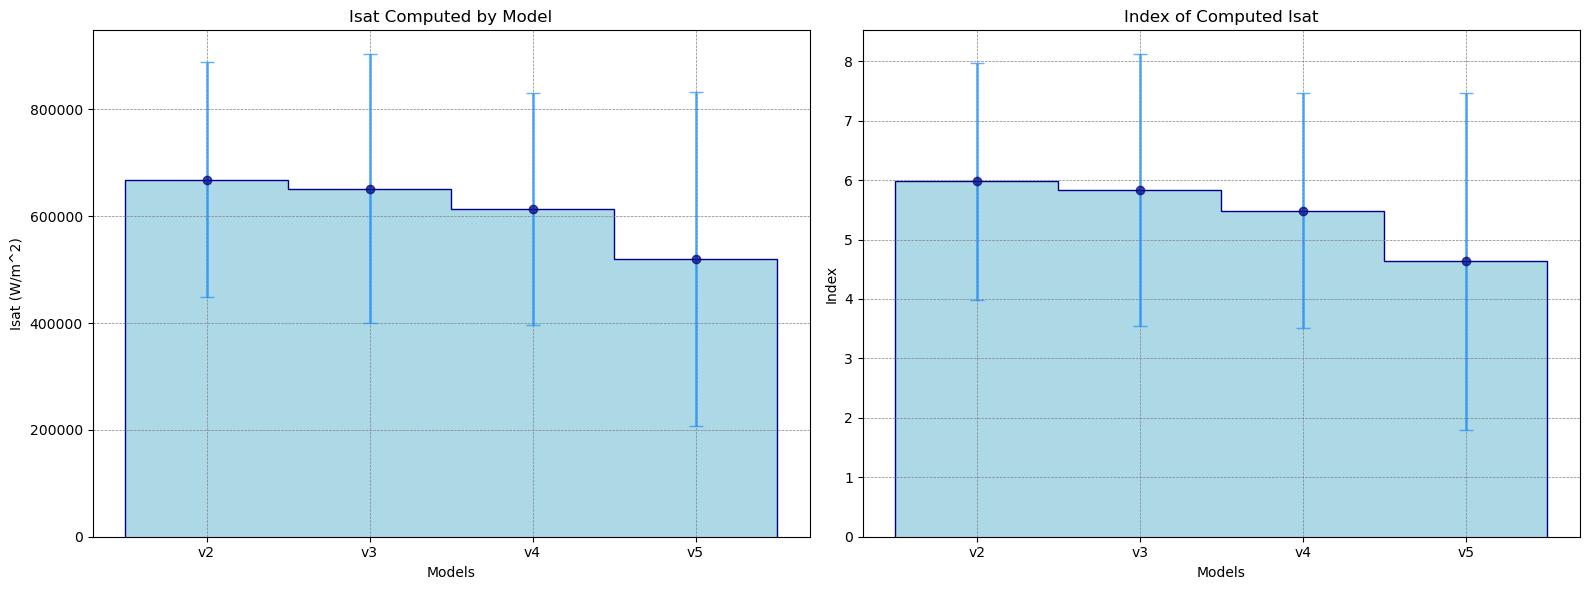

In [803]:
mean_accuracy_isat_models = np.zeros(4)
mean_index_error_isat_models = np.zeros(4)
std_accuracy_isat_models = np.zeros(4)
std_index_error_isat_models = np.zeros(4)


for index in range(len(model_types)):
    mean_accuracy_isat_models[index] = np.mean(model_types[index][3])
    mean_index_error_isat_models[index] = np.mean(model_types[index][4])
    std_accuracy_isat_models[index] = np.std(model_types[index][3])#/np.sqrt(len(model_types[index][3]))
    std_index_error_isat_models[index] = np.std(model_types[index][4])#/np.sqrt(len(model_types[index][4]))

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_isat_models, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_isat_models, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_isat_models, yerr=std_accuracy_isat_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title("Isat Computed by Model")
ax[0].set_ylabel('Isat (W/m^2)')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_isat_models, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_isat_models, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_isat_models, yerr=std_index_error_isat_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title("Index of Computed Isat")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

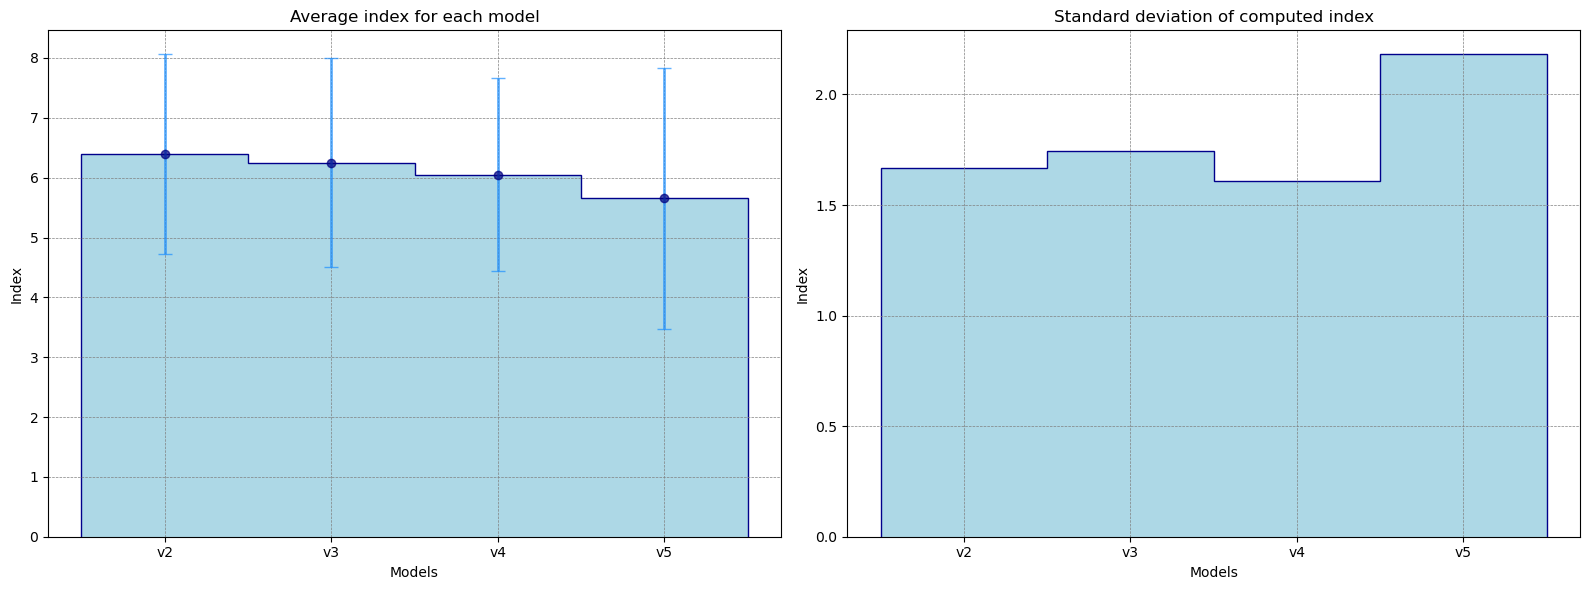

In [804]:
mean_accuracy_models = (mean_accuracy_n2_models + mean_accuracy_isat_models)/2
mean_index_error_models = (mean_index_error_n2_models + mean_index_error_isat_models )/2
std_index_error_models = (std_index_error_n2_models + std_index_error_isat_models )/2

x_positions = [0.5, 1.5, 2.5, 3.5]

# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_index_error_models, fill=True, color='lightblue')
ax[0].stairs(mean_index_error_models, color='darkblue')
ax[0].errorbar(x_positions,mean_index_error_models, yerr=std_index_error_models, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(models_list, rotation=0)
ax[0].set_title("Average index for each model")
ax[0].set_ylabel('Index')
ax[0].set_xlabel('Models')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(std_index_error_models, fill=True, color='lightblue')
ax[1].stairs(std_index_error_models, color='darkblue')
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(models_list, rotation=0)
ax[1].set_title("Standard deviation of computed index")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

Datatype comparison

In [805]:
amp_accuracy_n2 = []
amp_index_error_n2 = []

amp_accuracy_isat = []
amp_index_error_isat = []

amp_pha_accuracy_n2 = []
amp_pha_index_error_n2 = []

amp_pha_accuracy_isat = []
amp_pha_index_error_isat = []

amp_pha_unwrap_accuracy_n2 = []
amp_pha_unwrap_index_error_n2 = []

amp_pha_unwrap_accuracy_isat = []
amp_pha_unwrap_index_error_isat = []

pha_accuracy_n2 = []
pha_index_error_n2 = []

pha_accuracy_isat = []
pha_index_error_isat = []

pha_unwrap_accuracy_n2 = []
pha_unwrap_index_error_n2 = []

pha_unwrap_accuracy_isat = []
pha_unwrap_index_error_isat = []

amp_pha_pha_unwrap_accuracy_n2 = []
amp_pha_pha_unwrap_index_error_n2 = []

amp_pha_pha_unwrap_accuracy_isat = []
amp_pha_pha_unwrap_index_error_isat = []

data_types = [["amp",amp_accuracy_n2,amp_index_error_n2,
                amp_accuracy_isat,amp_index_error_isat],
                ["amp_pha",amp_pha_accuracy_n2,amp_pha_index_error_n2,
                amp_pha_accuracy_isat,amp_pha_index_error_isat], 
                ["amp_pha_unwrap",amp_pha_unwrap_accuracy_n2,amp_pha_unwrap_index_error_n2,
                amp_pha_unwrap_accuracy_isat,amp_pha_unwrap_index_error_isat],
                ["pha",pha_accuracy_n2,pha_index_error_n2,
                pha_accuracy_isat,pha_index_error_isat],
                ["pha_unwrap",pha_unwrap_accuracy_n2,pha_unwrap_index_error_n2,
                pha_unwrap_accuracy_isat,pha_unwrap_index_error_isat],
                ["amp_pha_pha_unwrap",amp_pha_pha_unwrap_accuracy_n2,amp_pha_pha_unwrap_index_error_n2,
                amp_pha_pha_unwrap_accuracy_isat,amp_pha_pha_unwrap_index_error_isat]]


model_types = ["model_resnetv2_1powers","model_resnetv3_1powers","model_resnetv4_1powers","model_resnetv5_1powers"]

for model_type in model_types:
    for properties in data_types:
        data_type = properties[0]
        data_accuracy_n2 = properties[1]
        data_index_error_n2 = properties[2]
        data_accuracy_isat = properties[3]
        data_index_error_isat = properties[4]

        data_accuracy_n2 += [json_to_dict[data_type][model_type][0]]
        data_index_error_n2 += [json_to_dict[data_type][model_type][1]]

        data_accuracy_isat += [json_to_dict[data_type][model_type][2]]
        data_index_error_isat += [json_to_dict[data_type][model_type][3]]

In [806]:
for index in range(len(data_types)):
    for i in range(1,5):
        data_types[index][i] = np.array(data_types[index][i])

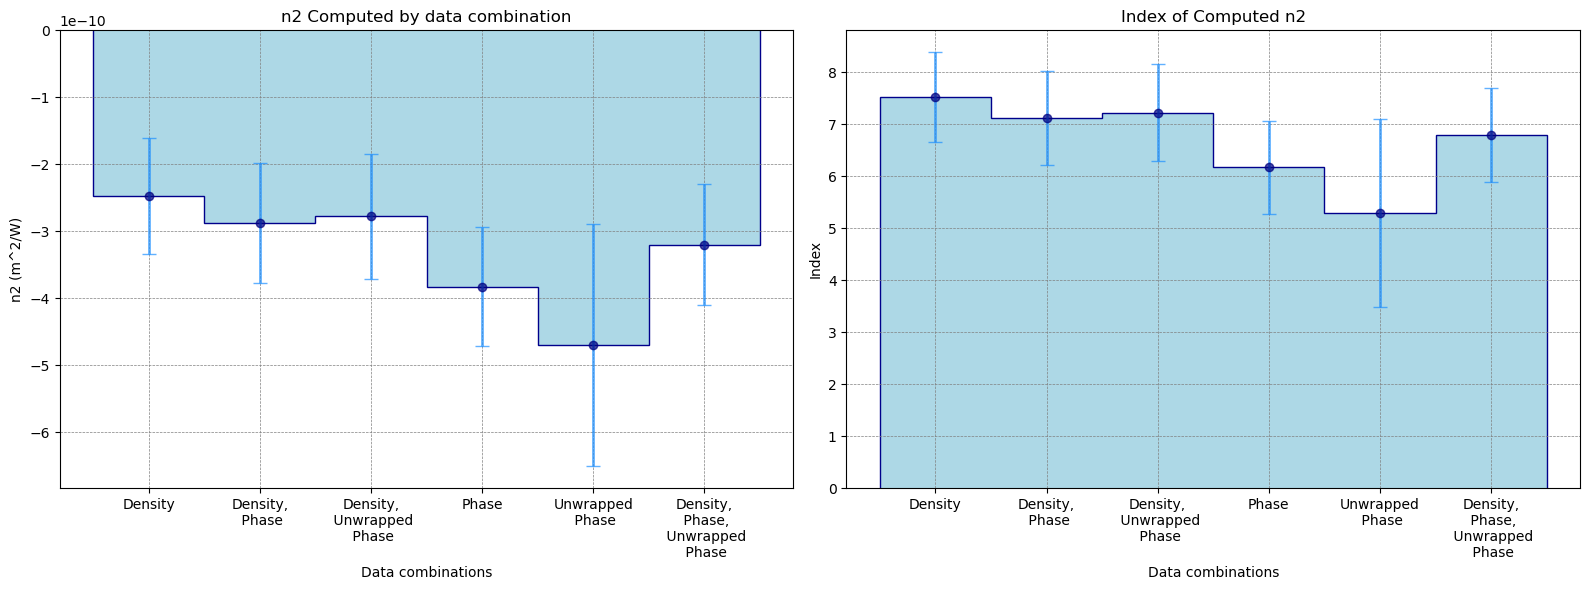

In [807]:
mean_accuracy_data_n2 = np.zeros(6)
mean_index_error_data_n2 = np.zeros(6)
std_accuracy_data_n2 = np.zeros(6)
std_index_error_data_n2 = np.zeros(6)


for index in range(len(data_types)):
    mean_accuracy_data_n2[index] = np.mean(data_types[index][1])
    mean_index_error_data_n2[index] = np.mean(data_types[index][2])
    std_accuracy_data_n2[index] = np.std(data_types[index][1])
    std_index_error_data_n2[index] = np.std(data_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_data_n2, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_data_n2, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_data_n2, yerr=std_accuracy_data_n2, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title("n2 Computed by data combination")
ax[0].set_ylabel('n2 (m^2/W)')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_data_n2, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_data_n2, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_data_n2, yerr=std_index_error_data_n2, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title("Index of Computed n2")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()

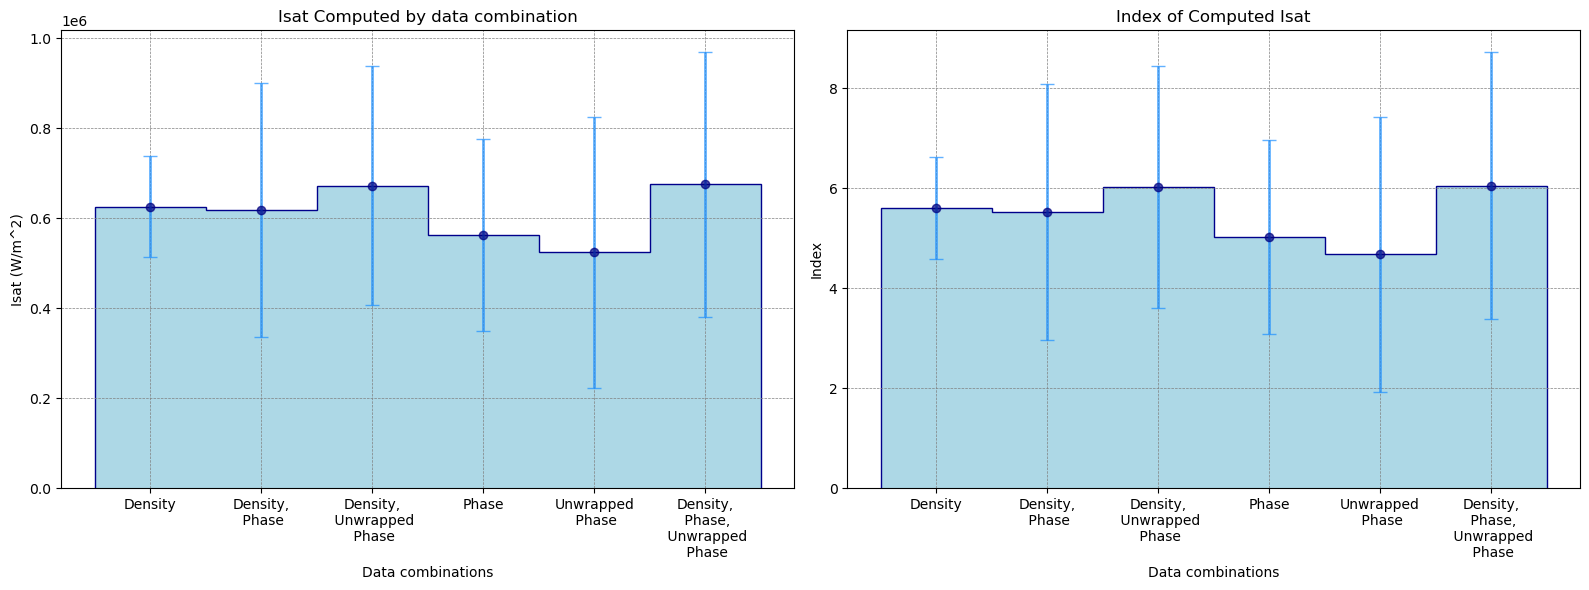

In [808]:
mean_accuracy_data_isat = np.zeros(6)
mean_index_error_data_isat = np.zeros(6)
std_accuracy_data_isat = np.zeros(6)
std_index_error_data_isat = np.zeros(6)


for index in range(len(data_types)):
    mean_accuracy_data_isat[index] = np.mean(data_types[index][3])
    mean_index_error_data_isat[index] = np.mean(data_types[index][4])
    std_accuracy_data_isat[index] = np.std(data_types[index][3])
    std_index_error_data_isat[index] = np.std(data_types[index][4])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_accuracy_data_isat, fill=True, color='lightblue')
ax[0].stairs(mean_accuracy_data_isat, color='darkblue')
ax[0].errorbar(x_positions, mean_accuracy_data_isat, yerr=std_accuracy_data_isat, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title("Isat Computed by data combination")
ax[0].set_ylabel('Isat (W/m^2)')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(mean_index_error_data_isat, fill=True, color='lightblue')
ax[1].stairs(mean_index_error_data_isat, color='darkblue')
ax[1].errorbar(x_positions, mean_index_error_data_isat, yerr=std_index_error_data_isat, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title("Index of Computed Isat")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()

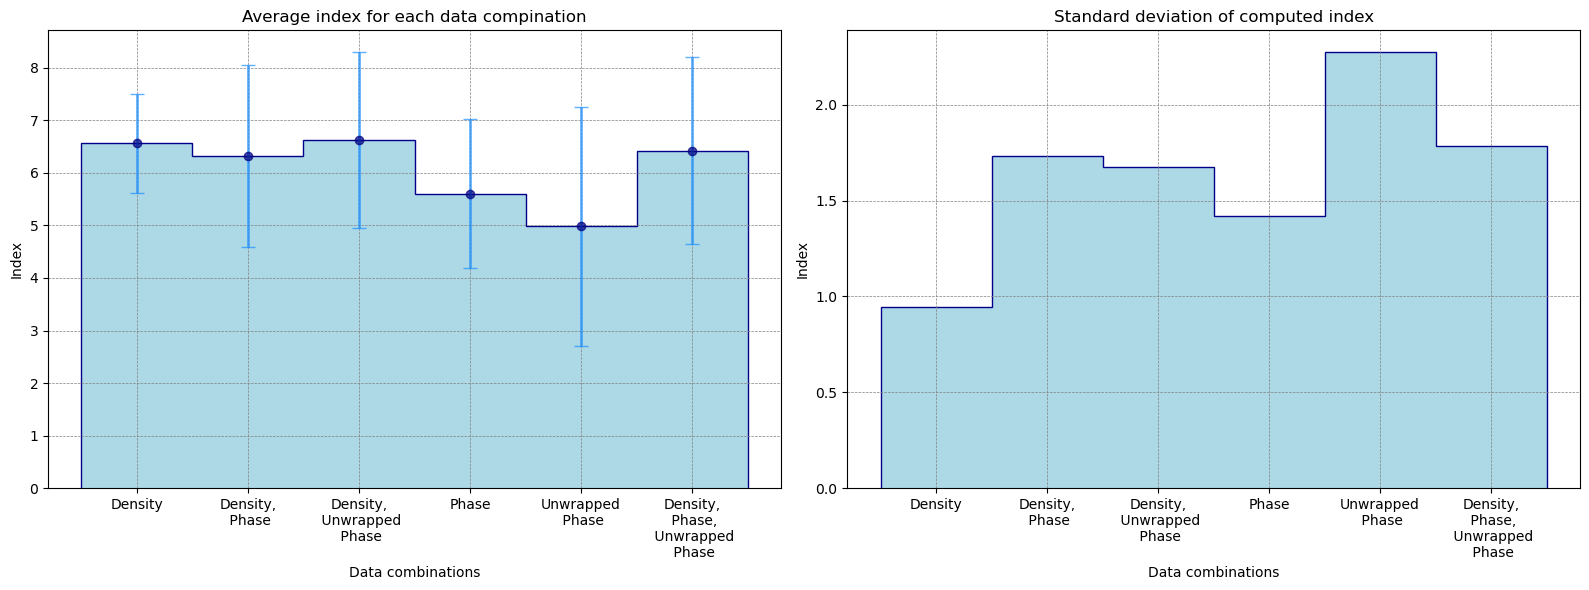

In [810]:
mean_accuracy_data = (mean_accuracy_data_n2 + mean_accuracy_data_isat)/2
mean_index_error_data = (mean_index_error_data_n2 + mean_index_error_data_isat )/2
std_index_error_data = (std_index_error_data_n2+ std_index_error_data_isat )/2

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
# Creating subplots on the same row
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[0].stairs(mean_index_error_data, fill=True, color='lightblue')
ax[0].stairs(mean_index_error_data, color='darkblue')
ax[0].errorbar(x_positions,mean_index_error_data, yerr=std_index_error_data, fmt="o", color="navy", ecolor='dodgerblue', elinewidth=2, capsize=5, alpha=0.7)
ax[0].set_xticks(x_positions)
ax[0].set_xticklabels(data_type_list, rotation=0)
ax[0].set_title("Average index for each data compination")
ax[0].set_ylabel('Index')
ax[0].set_xlabel('Data combinations')

# Second subplot
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
ax[1].stairs(std_index_error_data, fill=True, color='lightblue')
ax[1].stairs(std_index_error_data, color='darkblue')
ax[1].set_xticks(x_positions)
ax[1].set_xticklabels(data_type_list, rotation=0)
ax[1].set_title("Standard deviation of computed index")
ax[1].set_ylabel('Index')
ax[1].set_xlabel('Data combinations')

plt.tight_layout()
plt.show()